In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
# The simulation is based on the following:
# A number of people are moving randomly in specified square space
# the starting locations of persons are also random
# If in one second, the healthy people is within 1 meter from a contracted person, we randomly decide whether the person is contracted
# Every seconds a person move under a normal distribution of mean=0, standard deviation is specified by user, in meter
# We simulate the changes of location & state of persons every second


class person:
    def __init__(self, dist_room,state):
        """
        A simulation of a person, containing location & state of health information
        Input: 
            dist_room: How large the space is for the person to move around
        Attributes:
            x:x of coordinate
            y:y of coordinate
            dist_room: the space of room in meter
            covid: whether the person is contracted
        """
        self.x = np.random.uniform(low=0, high=dist_room)
        self.y = np.random.uniform(low=0, high=dist_room)
        self.dist_room = dist_room
        self.state = state

    def move(self, dist_walk,dist_drive):
        """
        Let the person "move" one second by changing coordinates, update x & y
        Input: dist: standard deviation of moving per second in a normal distribution
        """
        if self.state==0:        
            self.x = max(min(self.x+np.random.normal(scale=dist_walk), self.dist_room), 0)
            self.y = max(min(self.y+np.random.normal(scale=dist_walk), self.dist_room), 0)
        else:
            self.x = max(min(self.x+np.random.normal(scale=dist_drive), self.dist_room), 0)
            self.y = max(min(self.y+np.random.normal(scale=dist_drive), self.dist_room), 0)
        
    def reset(self):
        """
        Reset the attributes
        """
        self.x = np.random.uniform(low=0, high=dist_room)
        self.y = np.random.uniform(low=0, high=dist_room)




class room:
    def __init__(self, dist_room, guests):
        """
        Build the room with specified space, total guests anyd initial total patients
        Input:
            dist_rooms: width of the space, in meter
            guests: total guests at start
            init_covid: total covid patients at start
        Attributes:
            guest_list: the list of Person objects representing person information
            init_covid: total covid patients at start
            guests: total guests at start
            dist_rooms: width of the space, in meter
            total_contracted: the final total patients at the end of simulation
            contracted: list of contracted persons
            healthy: list of healthy persons
        """
        self.guest_list = [person(dist_room,0) for i in range(guests)]
        self.guests = guests
        self.dist_room = dist_room
        self.total_contact = 0

    def reset(self):
        """
        Reset the attributes
        """
        self.guest_list = [person(self.dist_room,0) for i in range(self.guests)]
        self.total_contact = 0

    def simulate_ten_sec(self, dist_drive, dist_walk):
        """
        Simulate the state of persons in this room after one second passes
        If in one second, the healthy people is within 1 meter from a contracted person, we randomly decide whether the person is contracted
        Input: dist: standard deviation of moving per second in a normal distribution
        """
        for j in range(len(self.guest_list)):
            self.guest_list[j].move(dist_walk,dist_drive)
        for l in self.guest_list:
            for m in self.guest_list:
                if ((l.x-m.x)**2+(l.y-m.y)**2) < 100:
                    self.total_contact += 1/2

    def simulate(self, dist_drive, dist_walk, state_list):
        """
        Simulate the state of persons in this room after specified length of time passes
        Input: 
            dist: standard deviation of moving per second in a normal distribution
            time: specified time length
        """
        self.reset()
        for i in state_list:
            for j in self.guest_list:
                j.state = i
            self.simulate_ten_sec(dist_drive,dist_walk)
        print('count')

In [28]:
def one_day_simulation(perc=0.6):
    simulation = room(1000, 3000)
    timelist = np.concatenate(
        (np.ones(360*3), np.zeros(360*10), np.ones(3*360)))
    simulation.simulate(100,1,timelist)
    
    simulation = room(1000, 3000)
    timelist = np.concatenate(
        (np.ones(360*3), np.zeros(360*10), np.ones(3*360)))
    simulation.simulate(100*perc,1*perc,timelist)
    
    return simulation1.total_contact/simulation.total_contact

In [2]:
np.concatenate((np.zeros(2),np.ones(2)))

array([0., 0., 1., 1.])

In [29]:
one_day_simulation()

KeyboardInterrupt: 

In [20]:
# Build the room object of 100m*100m space, 30 people, 5 contracted at start
# I assume the density becasue the density in Los Angeles is 2,910/square kilometer
simu1=room(100,30)

In [21]:
simu1.simulate(10,1,[0,0,0,0,1,1,1,1])

In [22]:
simu1.total_contact

215.0

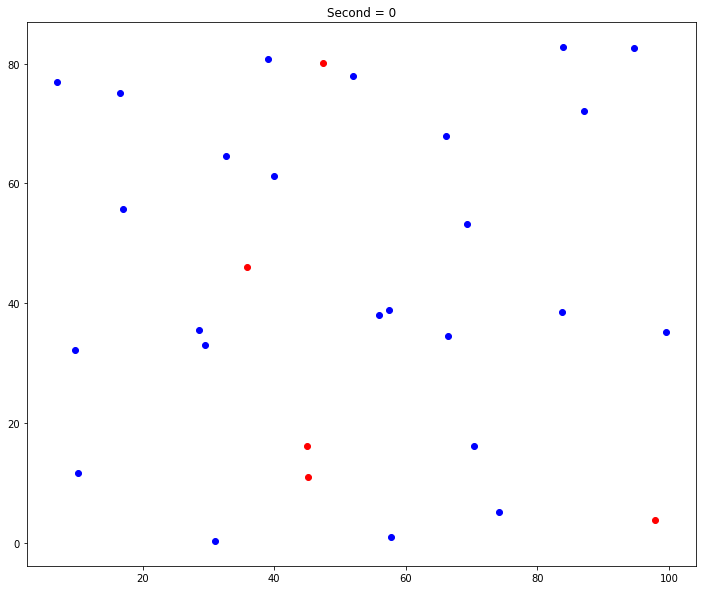

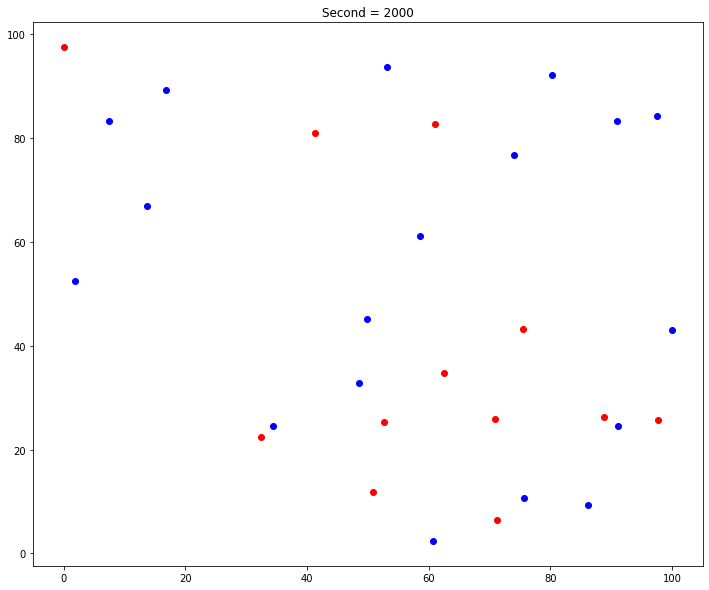

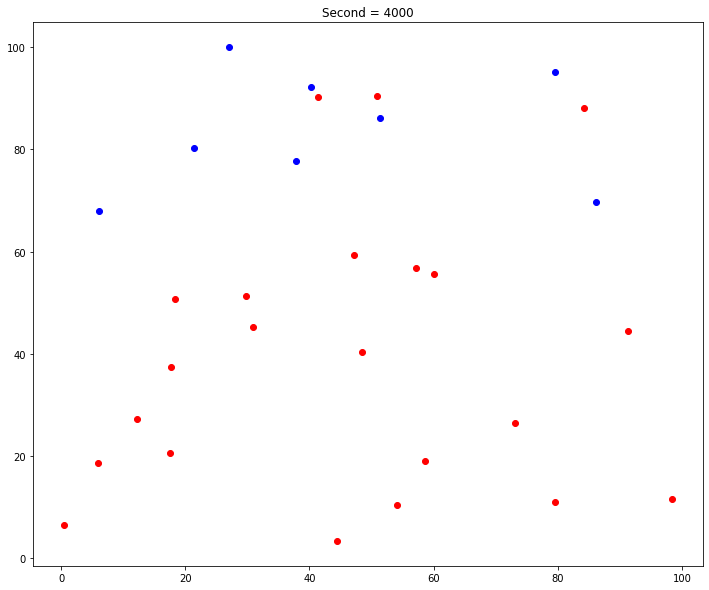

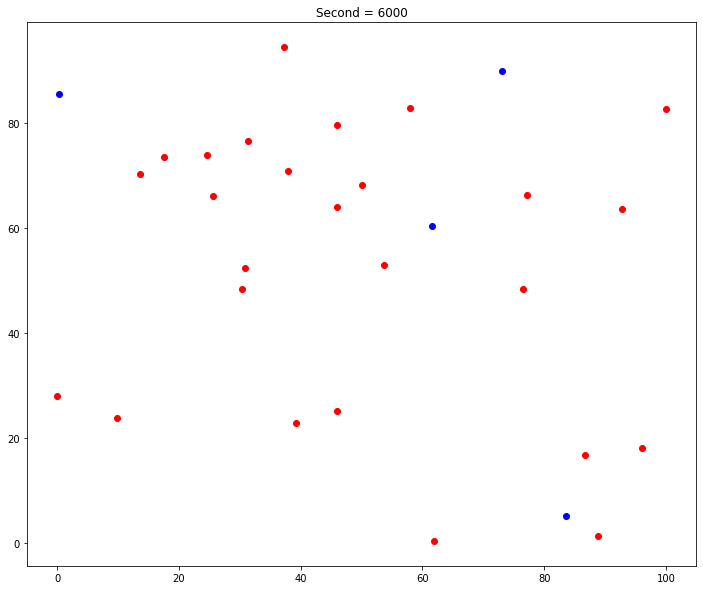

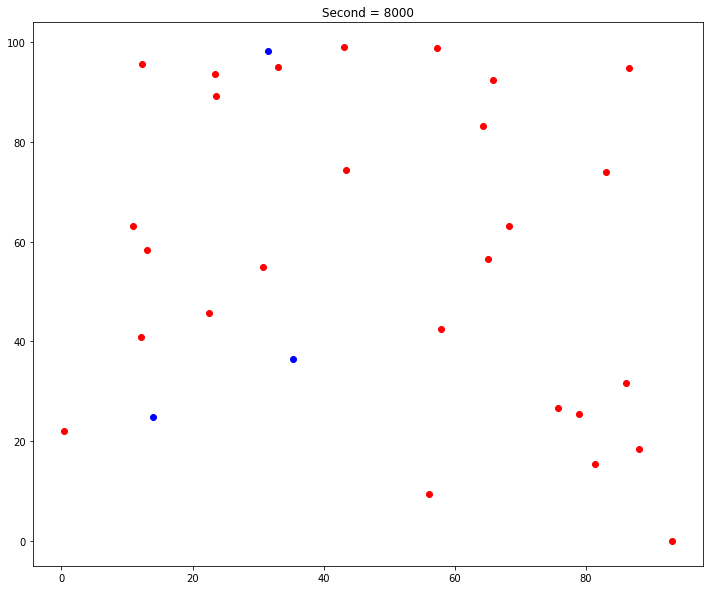

In [69]:
# A change of location & state of 30 people in 100m*100m space, time in 10000 seconds 
# Red is contracted, blue is healthy
simu1.simulate_plot(1,10000,2000)

In [125]:
# we calculate 5 curves of trend with standard deviation of moving distance from 0.2 meter to 1 meter
# each sample 20 times, taking average total contracted people
# time scale is from 0s to 5000s

total1=np.sum(np.array([simu1.simulate_trend(1,5000) for i in range(20)]),axis=0)/20
total_08=np.sum(np.array([simu1.simulate_trend(0.8,5000) for i in range(20)]),axis=0)/20
total_06=np.sum(np.array([simu1.simulate_trend(0.6,5000) for i in range(20)]),axis=0)/20
total_04=np.sum(np.array([simu1.simulate_trend(0.4,5000) for i in range(20)]),axis=0)/20
total_02=np.sum(np.array([simu1.simulate_trend(0.2,5000) for i in range(20)]),axis=0)/20

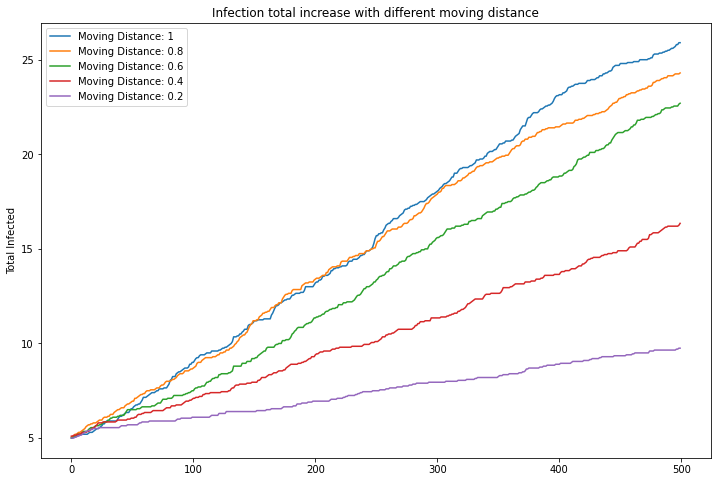

In [130]:
# plot the sampled 5 curves from 0.2 to 1
plt.figure(figsize=(12,8))
plt.plot(list(range(500)),total1,label='Moving Distance: 1')
plt.plot(list(range(500)),total_08,label='Moving Distance: 0.8')
plt.plot(list(range(500)),total_06,label='Moving Distance: 0.6')
plt.plot(list(range(500)),total_04,label='Moving Distance: 0.4')
plt.plot(list(range(500)),total_02,label='Moving Distance: 0.2')
plt.title('Infection total increase with different moving distance')
plt.ylabel('Total Infected')
plt.legend()